In [1]:
#working progress with the final push 
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#getting the data
df = pd.read_csv('Resources/BTC-USD.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-08,395.753998,415.562988,389.950012,415.562988,415.562988,57801400
1,2015-12-09,414.441010,423.119995,406.290985,417.562988,417.562988,90917200
2,2015-12-10,417.988007,419.509003,411.548004,415.479004,415.479004,52138900
3,2015-12-11,415.281006,451.937988,415.281006,451.937988,451.937988,110944000
4,2015-12-12,452.334991,469.102997,410.740997,434.997009,434.997009,131969000
5,2015-12-13,431.660004,441.679993,426.268005,433.755005,433.755005,55050600


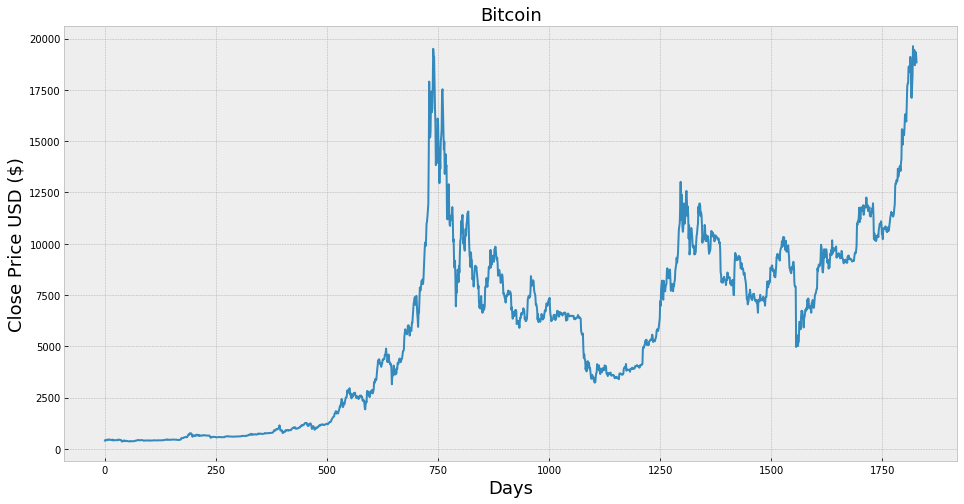

In [3]:
#Show the current trend for close price over the past 5 years to now 
plt.figure(figsize=(16,8))
plt.title('Bitcoin', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [4]:
df = df[['Close']]
df.head(4)

,Close
0,415.562988
1,417.562988
2,415.479004
3,451.937988


In [5]:
#Create a variable to predict 'x' days out into the future
future_days = 30
#Create a new column (the target or dependent variable) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
#print the data
df.head(4)

,Close,Prediction
0,415.562988,458.048004
1,417.562988,453.230011
2,415.479004,447.610992
3,451.937988,447.990997


In [6]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[  415.562988]
 [  417.562988]
 [  415.479004]
 ...
 [15565.880859]
 [14833.753906]
 [15479.567383]]


In [7]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  458.048004   453.230011   447.610992 ... 19345.121094 19191.630859
 18835.615234]


In [9]:
#split the data into 75% training and 25% testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
#create the models 
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [11]:
#last x rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)

x_future = np.array(x_future)
x_future

array([[11296.361328],
       [11384.181641],
       [11555.363281],
       [11425.899414],
       [11429.506836],
       [11495.349609],
       [11322.123047],
       [11358.101563],
       [11483.359375],
       [11742.037109],
       [11916.334961],
       [12823.689453],
       [12965.891602],
       [12931.539063],
       [13108.0625  ],
       [13031.173828],
       [13075.248047],
       [13654.21875 ],
       [13271.285156],
       [13437.882813],
       [13546.522461],
       [13780.995117],
       [13737.109375],
       [13550.489258],
       [13950.300781],
       [14133.707031],
       [15579.848633],
       [15565.880859],
       [14833.753906],
       [15479.567383]])

In [12]:
#show the model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#show the model linear regression prediction 
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[15332.31543  10178.37207  15701.339844 16276.34375  16317.808594
 10166.400391 15955.587891 16716.111328 17645.40625  17804.005859
 17817.089844 18370.001953 18642.232422 18370.001953 18364.121094
  9870.303711 18732.121094 17150.623047 17108.402344 17717.414063
 18177.484375  8598.30957  18802.998047 19201.091797 19445.398438
 18699.765625 19345.121094 19345.121094 19191.630859 18835.615234]

[11274.86673537 11358.13111701 11520.432217   11397.68466052
 11401.10493713 11463.53192687 11299.29199109 11333.40401808
 11452.16372075 11697.42180317 11862.67745271 12722.96032028
 12857.78532373 12825.21492151 12992.58069742 12919.68084646
 12961.46858856 13510.40352084 13147.3357086  13305.2906329
 13408.29428664 13630.60299911 13588.99395622 13412.05529463
 13791.12544475 13965.01696794 15336.13581427 15322.89265873
 14628.7468975  15241.05694259]


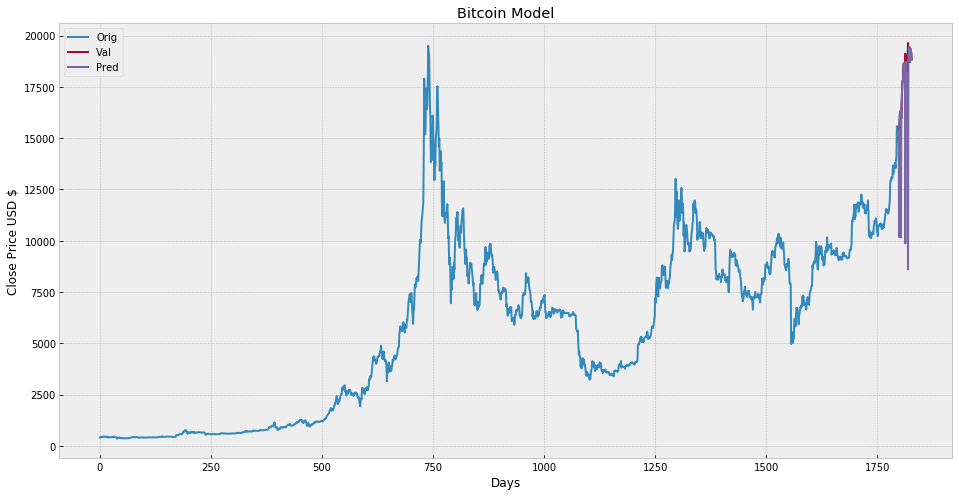

In [13]:
#visualize our predictions 
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Bitcoin Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD $')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

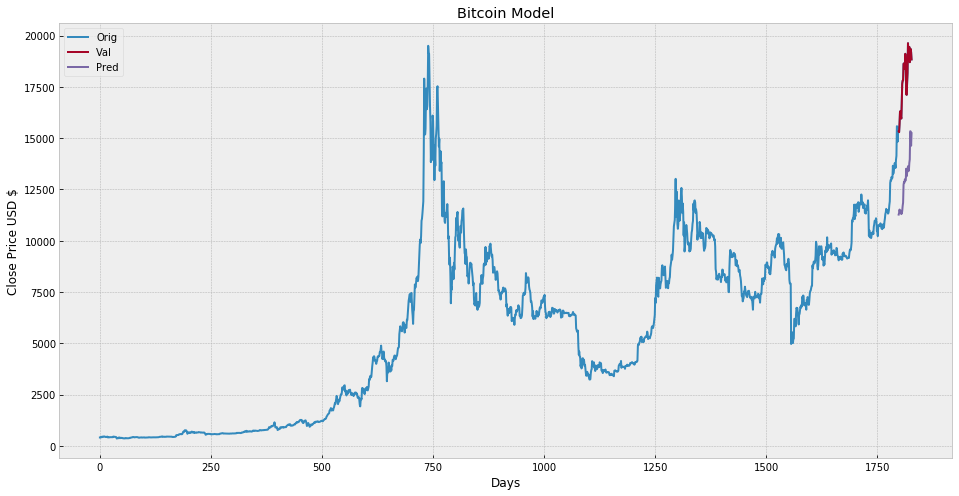

In [14]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Bitcoin Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD $')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()